In [1]:
import pandas  as pd
import seaborn as sns
import statistics as sts

In [9]:
data_set = pd.read_csv('dados/Churn.csv', sep=';')
data_set.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
data_set.shape

(999, 12)

In [11]:
data_set.columns = ['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo', 'Produtos', 'TemCartCredito', 'Ativo', 'Salario', 'Saiu']

In [13]:
data_set.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
#O objetivo da analise exploratoria é entender os dados e verificar se existem dados faltantes, outliers e dados inconsistentes.

In [15]:
#Explirar dados categoricos
#Estado
agrupado = data_set.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

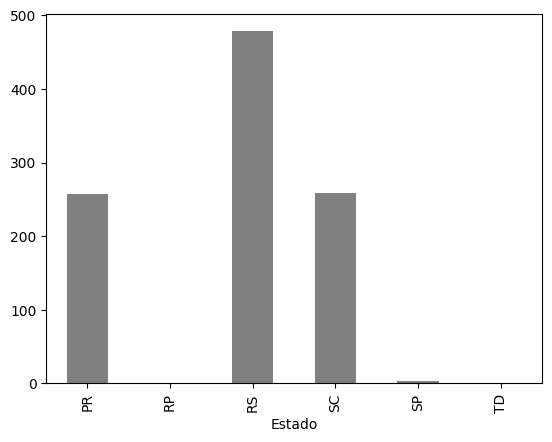

In [17]:
agrupado.plot.bar(color = 'gray')

In [18]:
agrupado = data_set.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

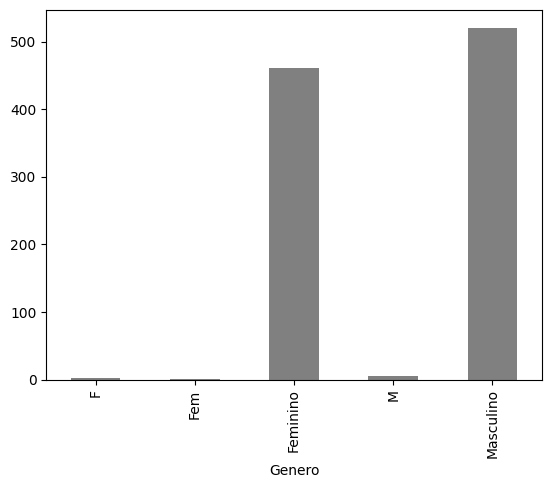

In [20]:
agrupado.plot.bar(color = 'gray')

In [22]:
#Explorar dados numéricos
#Score
data_set['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

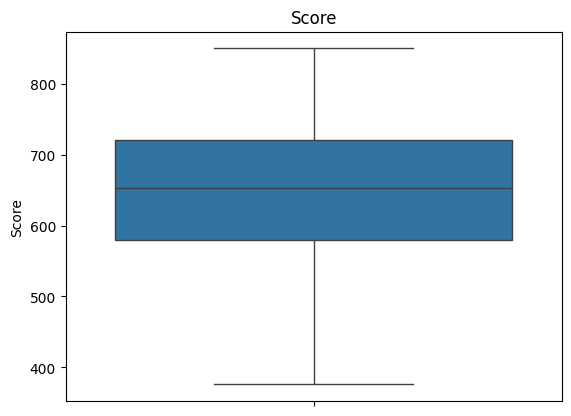

In [65]:
sns.boxplot(data_set['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

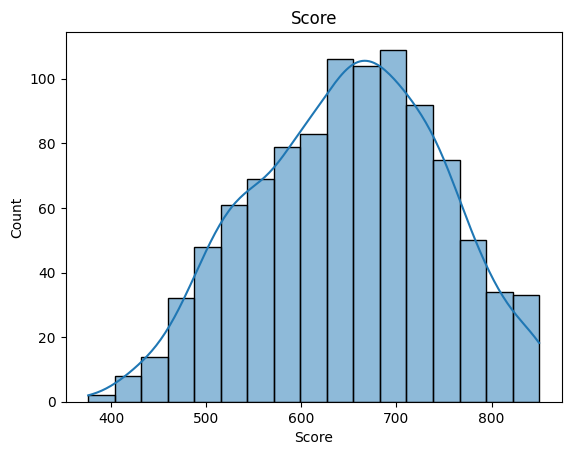

In [40]:
sns.histplot(data_set['Score'], kde='kde').set_title('Score')

In [42]:
data_set['Idade'].describe()


count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

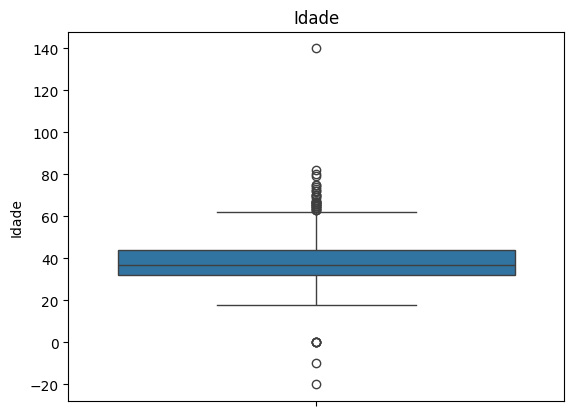

In [43]:
sns.boxplot(data_set['Idade']).set_title('Idade')


Text(0.5, 1.0, 'Idade')

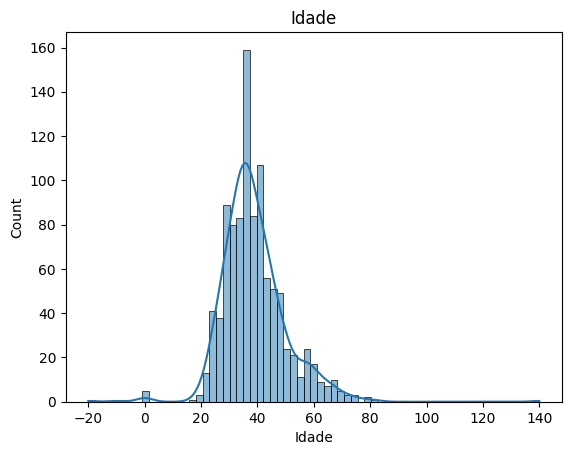

In [45]:
sns.histplot(data_set['Idade'], kde='kde').set_title('Idade')

In [47]:
data_set['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

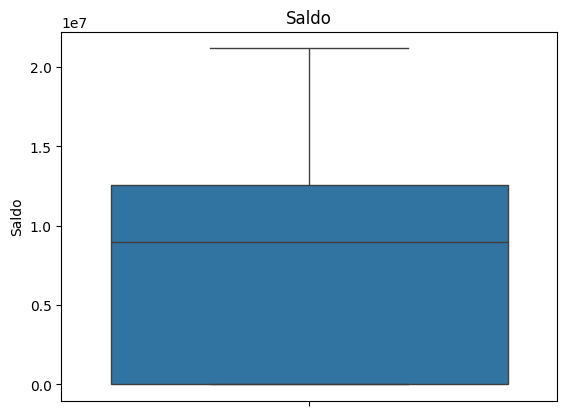

In [50]:
sns.boxplot(data_set['Saldo']).set_title('Saldo')


Text(0.5, 1.0, 'Saldo')

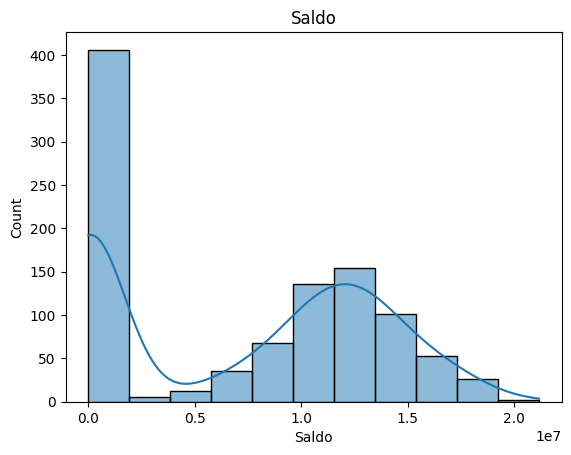

In [53]:
sns.histplot(data_set['Saldo'], kde='kde').set_title('Saldo')

In [55]:
data_set['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

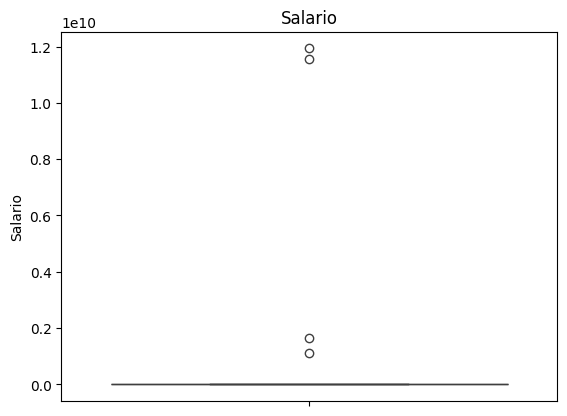

In [57]:
sns.boxplot(data_set['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

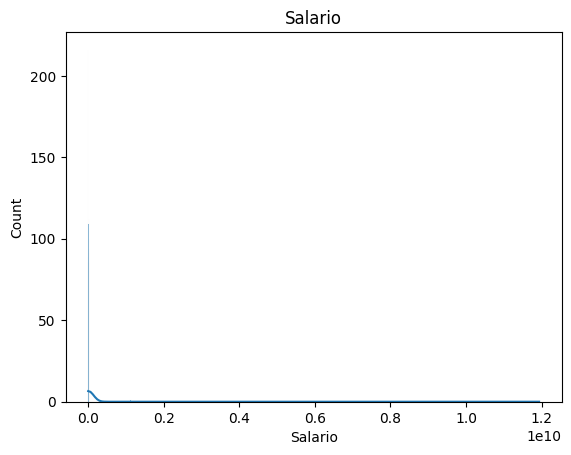

In [59]:
sns.histplot(data_set['Salario'], kde='kde').set_title('Salario')

In [60]:
#contando valores nulos
#genero e salário
data_set.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [61]:
#Limpeza dos dados

In [63]:
#Salario
#Substituior os NaNs pela mediana
data_set['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [67]:
mediana = sts.median(data_set['Salario'])
mediana

70518.0

In [70]:
data_set['Salario'].fillna(mediana, inplace=True)
data_set

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [73]:
data_set['Salario'].isnull().sum()

0

In [75]:
agrupado = data_set.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [77]:
data_set['Genero'].isnull().sum()

8

In [78]:
#preenche NANs com Masculino
data_set['Genero'].fillna('Masculino', inplace=True)

In [79]:
data_set['Genero'].isnull().sum()

0

In [83]:
#Padroniza de acordo com o dominio
data_set.loc[data_set['Genero'] == 'M', 'Genero'] = 'Masculino'
data_set.loc[data_set['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'
agrupado = data_set.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [85]:
data_set['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [88]:
data_set.loc[(data_set['Idade'] < 0) | (data_set['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [89]:
mediana = sts.median(data_set['Idade'])
mediana

37

In [90]:
data_set.loc[(data_set['Idade']) < 0 | (data_set['Idade'] > 120), 'Idade'] = mediana

In [92]:
data_set.loc[(data_set['Idade']) < 0 | (data_set['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [96]:
#Duplicados
data_set[data_set.duplicated(subset='Id', keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [99]:
data_set.drop_duplicates(subset='Id',  keep='first', inplace=True)
#Duplicados
data_set[data_set.duplicated(subset='Id', keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [102]:
#estados fora do dominio
agrupado = data_set.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [104]:
data_set.loc[data_set['Estado'].isin(['RP','SP','TD']), 'Estado'] = 'RS'
agrupado = data_set.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [105]:
desv = sts.stdev(data_set['Salario'])
desv

528988918.4679201

In [107]:
data_set.loc[data_set['Salario'] >= 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [108]:
mediana = sts.median(data_set['Salario'])
mediana

8637195.5

In [113]:
data_set.loc[data_set['Salario'] >= 2*desv, 'Salario'] = mediana
data_set.loc[data_set['Salario'] >= 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [110]:
data_set.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1.0,619.0,RS,Feminino,42.0,2.0,0.0,1.0,1.0,1.0,10134888.0,1.0
1,2.0,608.0,SC,Feminino,41.0,1.0,8380786.0,1.0,0.0,1.0,11254258.0,0.0
2,3.0,502.0,RS,Feminino,42.0,8.0,1596608.0,3.0,1.0,0.0,11393157.0,1.0
3,4.0,699.0,RS,Feminino,39.0,1.0,0.0,2.0,0.0,0.0,9382663.0,0.0
4,5.0,850.0,SC,Feminino,43.0,2.0,12551082.0,1.0,1.0,1.0,790841.0,0.0


In [115]:
data_set.shape

(998, 12)